In [1]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting
import statsmodels.api as sm  # statistical models (including regression)
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING


In [ ]:
"""DATA ACQUISITION"""

In [158]:
# Import Coaches9 data set from url into a dataframe
coaches_url = 'https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv'
Coaches = pd.read_csv(coaches_url,index_col=0,parse_dates=[0]).reset_index()
# Preview Coaches dataframe
Coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [159]:
# Import stadium data from Wikipedia website into a dataframe
stadium_url = 'http://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity'
stadiums = pd.read_html(stadium_url, attrs={"class":"wikitable"}, header=0)[0]
#Preview dataframe
stadiums

,Image,Stadium,Capacity,City,State/Province,Home teams,Refs,Unnamed: 7
0,NaN,Michigan Stadium,107601,Ann Arbor,Michigan,Michigan Wolverines,[1],NaN
1,NaN,Beaver Stadium,106572,University Park,Pennsylvania,Penn State Nittany Lions,[2],NaN
2,NaN,Kyle Field,102733,College Station,Texas,Texas A&M Aggies,NaN,NaN
3,NaN,Neyland Stadium,102455,Knoxville,Tennessee,Tennessee Volunteers,[3],NaN
4,NaN,Tiger Stadium,102321,Baton Rouge,Louisiana,LSU Tigers,[4],NaN
5,NaN,Ohio Stadium,102082,Columbus,Ohio,Ohio State Buckeyes,[5],NaN
6,NaN,Bryant–Denny Stadium,101821,Tuscaloosa,Alabama,Alabama Crimson Tide,[6],NaN
7,NaN,Darrell K Royal–Texas Memorial Stadium,100119,Austin,Texas,Texas Longhorns,[7],NaN
8,NaN,Los Angeles Memorial Coliseum,93607,Los Angeles,California,"USC Trojans, Los Angeles Rams",[8],NaN
9,NaN,Sanford Stadium,92746,Athens,Georgia,Georgia Bulldogs,[9],NaN


In [206]:
# Go to the following link : https://web3.ncaa.org/aprsearch/gsrsearch
# Then, input search criteria, and then save webpage with search results as html to local drive
# Next, import html and place into a dataframe
education_url = 'NCAA_Graduation_Success_Rate_2006.html'
education = pd.read_html(education_url)
gradrates_data = education[0]
#Preview sdataframe
gradrates_data.head()

,Cohort Year,School,Conference,Sport,State,GSR,FGR,GSR Report,FGR Report
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52.0,NaN,NaN
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45.0,NaN,NaN
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59.0,NaN,NaN
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57.0,NaN,NaN
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55.0,NaN,NaN


In [50]:
# Import win/loss records from Wikipedia website into a dataframe
records_url = 'https://en.wikipedia.org/wiki/NCAA_Division_I_FBS_football_win-loss_records'
records = pd.read_html(records_url, attrs={"class":"wikitable sortable"}, header=0)[0]
#Preview data
records.head()

,Team,Won,Lost,Tied,Pct.,Years,Total Games,Conference
0,Michigan,953,342,36,0.730,139,1331,Big Ten
1,Ohio State 1,911,325,53,0.727,129,1289,Big Ten
2,Notre Dame 2,897,324,42,0.727,129,1263,Independent
3,Boise State,448,168,2,0.727,51,618,Mountain West
4,Alabama 3,905,329,43,0.726,124,1277,SEC


In [160]:
# Import list of team details to help with merging datasets from Wikipedia website into a dataframe
names_url = 'https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_programs'
names = pd.read_html(names_url, attrs={"class":"wikitable sortable"}, header=0)[0]
#Preview data
names.head()

,Team,Nickname,City,State[1],CurrentConference,FormerConferences,FirstPlayed,JoinedFBS
0,Air Force,Falcons,Colorado Springs,Colorado,Mountain West,WAC,1955,NaN
1,Akron,Zips,Akron,Ohio,MAC,"OAC, MCC, OVC",1891,1987
2,Alabama,Crimson Tide,Tuscaloosa,Alabama,SEC,"SIAA, SoCon",1892,NaN
3,UAB,Blazers,Birmingham,Alabama,C-USA,NaN,1991,1999
4,Appalachian State,Mountaineers,Boone,North Carolina,Sun Belt,"NSC, SoCon",1928,2014[n 1]


In [ ]:
"""DATA TRANSFORMATION & CLEANSING"""

In [161]:
"""Use Fuzzywuzzy to match School from Coaches data file with those from Education, Stadium, Records, and Names"""
!pip install fuzzywuzzy
!pip install python-Levenshtein
# Reference: https://www.neudesic.com/blog/fuzzywuzzy-using-python/
# Reference: https://medium.com/@rtjeannier/combining-data-sets-with-fuzzy-matching-17efcb510ab2

In [162]:
# User defined function for fuzzy wuzzy to match two lists based on ratio scoring
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [163]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating Schools from Coaches dataframe
for name in Coaches.School:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, names.Team, 30)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"School" : name})
    dict_.update({"match__Name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
merge_table

,School,match__Name,score
0,Air Force,Air Force,100
1,Akron,Akron,100
2,Alabama,Alabama,100
3,Alabama at Birmingham,Alabama,50
4,Appalachian State,Appalachian State,100
5,Arizona,Arizona,100
6,Arizona State,Arizona State,100
7,Arkansas,Arkansas,100
8,Arkansas State,Arkansas State,100
9,Army,Army,100


In [64]:
# Write outputs to csv files using comma delimiter 
# Review output for any exceptions
merge_table.to_csv('merge_tablenames.csv', sep=',')
names.to_csv('names.csv', sep=',')
Coaches.to_csv('Coaches.csv', sep=',')

In [164]:
# Create a reference dataframe for exceptions to correct when matching names and coaches
Correct_Concatenate = ['BYU',
                    'UMass',
                    'UAB',
                    'UNLV',
                    'UTSA',
                    'UTEP',
                    'TCU',
                    'UCF',
                    'FIU',
                    'USC',
                    'SMU',
                    'Ole Miss',
                    'NC State']
Index= [16, 58, 3, 72, 110, 109, 106, 19, 33, 98, 99, 66, 76]
reference_coach_names = pd.DataFrame(Correct_Concatenate, index = Index)
print(reference_coach_names)


            0
16        BYU
58      UMass
3         UAB
72       UNLV
110      UTSA
109      UTEP
106       TCU
19        UCF
33        FIU
98        USC
99        SMU
66   Ole Miss
76   NC State


In [165]:
# Use Reference to Correct School Name in reference table
coachname_merge_table= merge_table
for i in reference_coach_names.index:
    coachname_merge_table.loc[coachname_merge_table.index == i , 'Names_Match_Name'] = reference_coach_names.loc[i,0]
    print(merge_table.loc[i,])

School                 Brigham Young
match__Name         Georgia Southern
score                             48
Names_Match_Name                 BYU
Name: 16, dtype: object
School              Massachusetts
match__Name          Kansas State
score                          48
Names_Match_Name            UMass
Name: 58, dtype: object
School              Alabama at Birmingham
match__Name                       Alabama
score                                  50
Names_Match_Name                      UAB
Name: 3, dtype: object
School              Nevada-Las Vegas
match__Name                   Nevada
score                             55
Names_Match_Name                UNLV
Name: 72, dtype: object
School              Texas-San Antonio
match__Name               Texas State
score                              57
Names_Match_Name                 UTSA
Name: 110, dtype: object
School              Texas-El Paso
match__Name           Texas State
score                          58
Names_Match_Name          

In [156]:
# Rename columns in names reference table
coachname_merge_table.columns = ['School', 'Names_Match_Name', 'score']
# Merge names reference table to Coaches
coaches_names_merge = Coaches.merge(coachname_merge_table, on="School", how = 'inner')

In [166]:
# Drop unneccesary columns from names dataframe before merging with coaches
names.drop('CurrentConference', axis=1, inplace=True)
names.drop('FormerConferences', axis=1, inplace=True)
names.drop('JoinedFBS', axis=1, inplace=True)
names.drop('FirstPlayed', axis=1, inplace=True)

In [168]:
# Rename columns in names prior to merging with Coaches
names.rename(columns={'Team':'Names_Match_Name'}, inplace=True)
# Merge Coaches with names with inner join 
coaches_names_merge = coaches_names_merge.merge(names, on="Names_Match_Name", how = 'inner')

In [169]:
coaches_names_merge

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Names_Match_Name,score,Nickname,City,State[1]
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,Air Force,100,Falcons,Colorado Springs,Colorado
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",Akron,100,Zips,Akron,Ohio
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",Alabama,100,Crimson Tide,Tuscaloosa,Alabama
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500",UAB,50,Blazers,Birmingham,Alabama
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",Appalachian State,100,Mountaineers,Boone,North Carolina
5,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",Arizona,100,Wildcats,Tucson,Arizona
6,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",Arizona State,100,Sun Devils,Tempe,Arizona
7,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000",Arkansas,100,Razorbacks,Fayetteville,Arkansas
8,Arkansas State,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000",Arkansas State,100,Red Wolves,Jonesboro,Arkansas
9,Army,Ind.,Jeff Monken,932521,932521,--,--,$0,--,Army,100,Black Knights,West Point,New York


In [170]:
# Next work on merging the Coaches_names_merge dataframe with Stadium data using School and Nickname Concatenate
coaches_names_merge['Concatenate_SN'] = coaches_names_merge['School'] +' '+ coaches_names_merge['Nickname']

In [171]:
# Drop unneccesary columns from stadiums dataframe 
stadiums.drop('Image', axis=1, inplace=True)
#stadiums.drop('Stadium', axis=1, inplace=True)
#stadiums.drop('City', axis=1, inplace=True)
#stadiums.drop('State/Province', axis=1, inplace=True)
stadiums.drop('Refs', axis=1, inplace=True)
stadiums.drop('Unnamed: 7', axis=1, inplace=True)

In [172]:
# Rename columns in stadiums 
stadiums.columns = ['Stadium', 'Stadium_Capacity', 'City', 'State','Team']

In [ ]:
# Write output file to find needed corrections
stadiums.to_csv('stadiums.csv', sep=',')

In [174]:
# Clean Stadium data
Correct_Concatenate = ['UCLA Bruins',
                    'UAB Blazers',
                    'San Diego State Aztecs',
                    'Navy Game',
                    'Tennessee State Tigers',
                    'UMass',
                    'Pittsburgh Panthers',
                    'Arizona State Sun Devils ',
                    'South Florida Bulls',
                    'Cincinnati Bearcats',
                    'Miami Hurricanes',
                    'UTSA Roadrunners', 
                    'Detroit Lions', 
                    'Jacksonville Jaguars',
                    'Arizona Cardinals',
                    'Memphis Tigers', 
                    'Hawaii Warriors', 
                    'TCU Horned Frogs', 
                    'South Alabama Jaguars', 
                    'Boise State Broncos ', 
                    'UNLV Rebels',
                    'Wichita State University Shockers']
Index= [11, 
        32, 
        38, 
        40, 
        41, 
        43, 
        45 ,
        50, 
        51 ,
        52, 
        53, 
        54, 
        56,
        57,
        60, 
        65, 
        94, 
        106, 
        110, 
        118, 
        120, 
        147]
reference_stadium_correct = pd.DataFrame(Correct_Concatenate, index = Index)



In [175]:
#Use Reference to Correct in Reference table
for i in reference_stadium_correct.index:
    stadiums.loc[stadiums.index == i , 'Team'] = reference_stadium_correct.loc[i,0]
    print(stadiums.loc[i,])


Stadium               Rose Bowl
Stadium_Capacity          90888
City                   Pasadena
State                California
Team                UCLA Bruins
Name: 11, dtype: object
Stadium             Legion Field
Stadium_Capacity           71594
City                  Birmingham
State                    Alabama
Team                 UAB Blazers
Name: 32, dtype: object
Stadium                      SDCCU Stadium
Stadium_Capacity                     70561
City                             San Diego
State                           California
Team                San Diego State Aztecs
Name: 38, dtype: object
Stadium             Lincoln Financial Field
Stadium_Capacity                      69172
City                           Philadelphia
State                          Pennsylvania
Team                              Navy Game
Name: 40, dtype: object
Stadium                     Nissan Stadium
Stadium_Capacity                     69143
City                             Nashville
State          

In [176]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating Schools from Coaches dataframe
for name in coaches_names_merge.Concatenate_SN:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, stadiums.Team, 30)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"School" : name})
    dict_.update({"match__Name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table2 = pd.DataFrame(dict_list)
# Display results
merge_table2

,School,match__Name,score
0,Air Force Falcons,Air Force Falcons,100
1,Akron Zips,Akron Zips,100
2,Alabama Crimson Tide,Alabama Crimson Tide,100
3,Alabama at Birmingham Blazers,Alabama Crimson Tide,53
4,Appalachian State Mountaineers,Michigan State Spartans,60
5,Arizona Wildcats,Arizona Wildcats,100
6,Arizona State Sun Devils,Arizona State Sun Devils,98
7,Arkansas Razorbacks,Arkansas Razorbacks,100
8,Arkansas State Red Wolves,Arkansas State Red Wolves,100
9,Army Black Knights,Army Black Knights,100


In [177]:
# Write outputs to csv files using comma delimiter 
# Review output for any exceptions
merge_table2.to_csv('merge_tablestadiums.csv', sep=',')
stadiums.to_csv('stadiums2.csv', sep=',')
coaches_names_merge.to_csv('coaches_names_merge.csv', sep=',')

In [181]:
# Create a reference dataframe for exceptions to correct 
Correct_Concatenate = ['UAB Blazers',
                        'Carolina Panthers, the Belk Bowl game, and the Dr Pepper ACC Championship Game',
                        'UMass',
                        'Ole Miss Rebels',
                        'New Mexico Lobos and the New Mexico Bowl game',
                        'USC Trojans, Los Angeles Rams',
                        'SMU Mustangs',
                        'UTEP Miners and the Sun Bowl game',
                        'Utah Utes']
Index= [3,
        21,
        58,
        66,
        73,
        98,
        99,
        109,
        117]
reference_coach_stadium = pd.DataFrame(Correct_Concatenate, index = Index)
print(reference_coach_stadium)

                                                     0
3                                          UAB Blazers
21   Carolina Panthers, the Belk Bowl game, and the...
58                                               UMass
66                                     Ole Miss Rebels
73       New Mexico Lobos and the New Mexico Bowl game
98                       USC Trojans, Los Angeles Rams
99                                        SMU Mustangs
109                  UTEP Miners and the Sun Bowl game
117                                          Utah Utes


In [182]:
# Use Reference to Correct school in reference table 
coach_stadium_table= merge_table2
for i in reference_coach_stadium.index:
    coach_stadium_table.loc[coach_stadium_table.index == i , 'match__Name'] = reference_coach_stadium.loc[i,0]
    print(coach_stadium_table.loc[i,])

School         Alabama at Birmingham Blazers
match__Name                      UAB Blazers
score                                     53
Name: 3, dtype: object
School                                           Charlotte 49ers
match__Name    Carolina Panthers, the Belk Bowl game, and the...
score                                                         57
Name: 21, dtype: object
School         Massachusetts Minutemen
match__Name                      UMass
score                               43
Name: 58, dtype: object
School         Mississippi Rebels
match__Name       Ole Miss Rebels
score                          68
Name: 66, dtype: object
School                                      New Mexico Lobos
match__Name    New Mexico Lobos and the New Mexico Bowl game
score                                                     62
Name: 73, dtype: object
School           Southern California Trojans
match__Name    USC Trojans, Los Angeles Rams
score                                     59
Name: 98, dtyp

In [185]:
# Rename columns in stadium reference table
coach_stadium_table.columns = ['Concatenate_SN', 'Stadium_Match_Name', 'score']

In [198]:
# Merge stadium reference table to Coaches
coaches_stad_merge = coaches_names_merge.merge(coach_stadium_table, on="Concatenate_SN", how = 'inner')

In [201]:
# Rename columns in Stadium prior to merging with Coaches
stadiums.rename(columns={'Team':'Stadium_Match_Name'}, inplace=True)



In [202]:
# Merge Coaches with Stadium with inner join 
coaches_stad_merge = coaches_stad_merge.merge(stadiums, on="Stadium_Match_Name", how = 'inner')

In [204]:
coaches_stad_merge.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Names_Match_Name,...,Nickname,City_x,State[1],Concatenate_SN,Stadium_Match_Name,score_y,Stadium,Stadium_Capacity,City_y,State
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,Air Force,...,Falcons,Colorado Springs,Colorado,Air Force Falcons,Air Force Falcons,100,Falcon Stadium,52480,Colorado Springs,Colorado
1,Bowling Green,MAC,Mike Jinks,"$437,228","$437,228","$245,000","$81,250",$0,"$874,456",Bowling Green,...,Falcons,Bowling Green,Ohio,Bowling Green Falcons,Air Force Falcons,63,Falcon Stadium,52480,Colorado Springs,Colorado
2,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",Akron,...,Zips,Akron,Ohio,Akron Zips,Akron Zips,100,InfoCision Stadium–Summa Field,30000,Akron,Ohio
3,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",Alabama,...,Crimson Tide,Tuscaloosa,Alabama,Alabama Crimson Tide,Alabama Crimson Tide,100,Bryant–Denny Stadium,101821,Tuscaloosa,Alabama
4,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500",UAB,...,Blazers,Birmingham,Alabama,Alabama at Birmingham Blazers,UAB Blazers,53,Legion Field,71594,Birmingham,Alabama


In [214]:
# Next work on merging the Coaches_names_merge dataframe with Stadium data using School and Conference Concatenate
coaches_stad_merge['Concatenate_SC'] = coaches_stad_merge['School'] +' '+ coaches_stad_merge['Conference']

In [208]:
gradrates_data['Concatenate_SC'] = gradrates_data['School'] +' '+ gradrates_data['Conference']

In [209]:
# Drop unneccesary columns from stadiums dataframe 
gradrates_data.drop('Cohort Year', axis=1, inplace=True)
gradrates_data.drop('Sport', axis=1, inplace=True)
gradrates_data.drop('State', axis=1, inplace=True)
gradrates_data.drop('GSR Report', axis=1, inplace=True)
gradrates_data.drop('FGR Report', axis=1, inplace=True)

In [215]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating Schools from Coaches dataframe
for name in coaches_stad_merge.Concatenate_SC:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, gradrates_data.Concatenate_SC, 30)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"School" : name})
    dict_.update({"match__Name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table3 = pd.DataFrame(dict_list)
# Display results
merge_table3

,School,match__Name,score
0,Air Force Mt. West,U.S. Air Force Academy Mountain West Conference,52
1,Bowling Green MAC,Bowling Green State University Mid-American Co...,48
2,Akron MAC,University of Akron Mid-American Conference,35
3,Alabama SEC,University of Alabama Southeastern Conference,36
4,Alabama at Birmingham C-USA,University of Alabama at Birmingham Conference...,68
5,Appalachian State Sun Belt,Appalachian State University Southern Conference,62
6,Michigan State Big Ten,Michigan State University Big Ten Conference,67
7,Arizona Pac-12,University of Arizona Pac-12 Conference,53
8,Arizona State Pac-12,Arizona State University Pac-12 Conference,65
9,Arkansas SEC,Arkansas State University Sun Belt Conference,39


In [216]:
# Write outputs to csv files using comma delimiter 
# Review output for any exceptions
merge_table3.to_csv('merge_tablegradrates.csv', sep=',')
gradrates_data.to_csv('gradrates_data.csv', sep=',')
coaches_names_merge.to_csv('coaches_names_merge.csv', sep=',')

In [217]:
# Create a reference dataframe for exceptions to correct 
Correct_Concatenate = ['University of Alabama Southeastern Conference',
                        'University of Arkansas, Fayetteville Southeastern Conference',
                        'University at Buffalo, the State University of New York Mid-American Conference',
                        'University of California, Berkeley Pac-12 Conference',
                        'California State University, Fresno Mountain West Conference',
                        'University of Illinois Urbana-Champaign Big Ten Conference',
                        'Liberty University Big South Conference',
                        'University of Maryland, College Park',
                        'University of Minnesota, Twin Cities Big Ten Conference',
                        'University of North Carolina, Chapel Hill Atlantic Coast Conference',
                        'Rutgers, The State University of New Jersey, New Brunswick American Athletic Conference',
                        'University of Tennessee, Knoxville Southeastern Conference',
                        'University of Texas at Austin Big 12 Conference',
                        'Texas State University Western Athletic Conference',
                        'University of California, Los Angeles Pac-12 Conference',
                        'Virginia Polytechnic Institute and State University Atlantic Coast Conference']
Index= [3,
        9,
        19,
        20,
        39,
        46,
        54,
        61,
        68,
        79,
        95,
        105,
        106,
        109,
        116,
        121]
reference_coach_grad = pd.DataFrame(Correct_Concatenate, index = Index)
print(reference_coach_grad)

                                                     0
3        University of Alabama Southeastern Conference
9    University of Arkansas, Fayetteville Southeast...
19   University at Buffalo, the State University of...
20   University of California, Berkeley Pac-12 Conf...
39   California State University, Fresno Mountain W...
46   University of Illinois Urbana-Champaign Big Te...
54             Liberty University Big South Conference
61                University of Maryland, College Park
68   University of Minnesota, Twin Cities Big Ten C...
79   University of North Carolina, Chapel Hill Atla...
95   Rutgers, The State University of New Jersey, N...
105  University of Tennessee, Knoxville Southeaster...
106    University of Texas at Austin Big 12 Conference
109  Texas State University Western Athletic Confer...
116  University of California, Los Angeles Pac-12 C...
121  Virginia Polytechnic Institute and State Unive...


In [218]:
# Use Reference to Correct Matched name
coach_grad_table= merge_table3
for i in reference_coach_grad.index:
    coach_grad_table.loc[coach_grad_table.index == i , 'match__Name'] = reference_coach_grad.loc[i,0]
    print(coach_grad_table.loc[i,])

School                                           Alabama SEC
match__Name    University of Alabama Southeastern Conference
score                                                     36
Name: 3, dtype: object
School                                              Arkansas SEC
match__Name    University of Arkansas, Fayetteville Southeast...
score                                                         39
Name: 9, dtype: object
School                                               Buffalo MAC
match__Name    University at Buffalo, the State University of...
score                                                         -1
Name: 19, dtype: object
School                                         California Pac-12
match__Name    University of California, Berkeley Pac-12 Conf...
score                                                         50
Name: 20, dtype: object
School                                     Fresno State Mt. West
match__Name    California State University, Fresno Mountain W...
score   

In [221]:
# Rename columns in grad reference table
coach_grad_table.columns = ['Concatenate_SC', 'Grad_Match_Name', 'score']

In [222]:
# Merge graduation reference table to Coaches
coaches_grad_merge = coaches_stad_merge.merge(coach_grad_table, on="Concatenate_SC", how = 'inner')

In [225]:
# Rename columns in graduation data prior to merging with Coaches
gradrates_data.rename(columns={'Concatenate_SC':'Grad_Match_Name'}, inplace=True)


In [229]:
# Merge Coaches with graduation data with inner join 
coaches_grad_merge = coaches_grad_merge.merge(gradrates_data, on="Grad_Match_Name", how = 'inner')

In [230]:
coaches_grad_merge.head()

,School_x,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Names_Match_Name,...,Stadium_Capacity,City_y,State,Concatenate_SC,Grad_Match_Name,score,School_y,Conference_y,GSR,FGR
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,Air Force,...,52480,Colorado Springs,Colorado,Air Force Mt. West,U.S. Air Force Academy Mountain West Conference,52,U.S. Air Force Academy,Mountain West Conference,93,NaN
1,Bowling Green,MAC,Mike Jinks,"$437,228","$437,228","$245,000","$81,250",$0,"$874,456",Bowling Green,...,52480,Colorado Springs,Colorado,Bowling Green MAC,Bowling Green State University Mid-American Co...,48,Bowling Green State University,Mid-American Conference,70,55.0
2,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",Akron,...,30000,Akron,Ohio,Akron MAC,University of Akron Mid-American Conference,35,University of Akron,Mid-American Conference,58,52.0
3,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",Alabama,...,101821,Tuscaloosa,Alabama,Alabama SEC,University of Alabama Southeastern Conference,36,University of Alabama,Southeastern Conference,73,57.0
4,South Alabama,Sun Belt,Steve Campbell,"$600,000","$600,000","$295,000",--,$0,"$918,333",South Alabama,...,40646,Mobile,Alabama,South Alabama Sun Belt,University of Alabama Southeastern Conference,45,University of Alabama,Southeastern Conference,73,57.0


In [231]:
coaches_grad_merge.columns

Index(['School_x', 'Conference_x', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout', 'Names_Match_Name', 'score_x',
       'Nickname', 'City_x', 'State[1]', 'Concatenate_SN',
       'Stadium_Match_Name', 'score_y', 'Stadium', 'Stadium_Capacity',
       'City_y', 'State', 'Concatenate_SC', 'Grad_Match_Name', 'score',
       'School_y', 'Conference_y', 'GSR', 'FGR'],
      dtype='object')

In [232]:
# Drop unneccesary columns in coaches_grad_merge dataframe to clean upo
coaches_grad_merge.drop('Conference_y', axis=1, inplace=True)
coaches_grad_merge.drop('School_y', axis=1, inplace=True)
coaches_grad_merge.drop('score', axis=1, inplace=True)
coaches_grad_merge.drop('Grad_Match_Name', axis=1, inplace=True)
coaches_grad_merge.drop('City_y', axis=1, inplace=True)
coaches_grad_merge.drop('score_y', axis=1, inplace=True)
coaches_grad_merge.drop('Stadium_Match_Name', axis=1, inplace=True)
coaches_grad_merge.drop('score_x', axis=1, inplace=True)
coaches_grad_merge.drop('Names_Match_Name', axis=1, inplace=True)
coaches_grad_merge.drop('Stadium', axis=1, inplace=True)
coaches_grad_merge.drop('State', axis=1, inplace=True)

In [235]:
records

,Team,Won,Lost,Tied,Pct.,Years,Total Games,Conference
0,Michigan,953,342,36,0.730,139,1331,Big Ten
1,Ohio State 1,911,325,53,0.727,129,1289,Big Ten
2,Notre Dame 2,897,324,42,0.727,129,1263,Independent
3,Boise State,448,168,2,0.727,51,618,Mountain West
4,Alabama 3,905,329,43,0.726,124,1277,SEC
5,Oklahoma,896,325,53,0.724,124,1274,Big 12
6,Texas,908,370,33,0.705,126,1311,Big 12
7,USC 4,839,346,54,0.699,125,1239,Pac-12
8,Nebraska,897,388,40,0.692,129,1325,Big Ten
9,Penn State,887,391,41,0.688,132,1319,Big Ten


In [236]:
# Next work on merging the Coaches_grad_merge dataframe with records wins data using Team / School and Conference Concatenate
records['Concatenate_SR'] = records['Team'] +' '+ records['Conference']

In [238]:
# Rename column in coaches_grad_merge
coaches_grad_merge.rename(columns={'Concatenate_SC':'Concatenate_SR'}, inplace=True)

In [239]:
coaches_grad_merge

,School_x,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Nickname,City_x,State[1],Concatenate_SN,Stadium_Capacity,Concatenate_SR,GSR,FGR
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,Falcons,Colorado Springs,Colorado,Air Force Falcons,52480,Air Force Mt. West,93,NaN
1,Bowling Green,MAC,Mike Jinks,"$437,228","$437,228","$245,000","$81,250",$0,"$874,456",Falcons,Bowling Green,Ohio,Bowling Green Falcons,52480,Bowling Green MAC,70,55.0
2,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",Zips,Akron,Ohio,Akron Zips,30000,Akron MAC,58,52.0
3,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",Crimson Tide,Tuscaloosa,Alabama,Alabama Crimson Tide,101821,Alabama SEC,73,57.0
4,South Alabama,Sun Belt,Steve Campbell,"$600,000","$600,000","$295,000",--,$0,"$918,333",Jaguars,Mobile,Alabama,South Alabama Jaguars,40646,South Alabama Sun Belt,73,57.0
5,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500",Blazers,Birmingham,Alabama,Alabama at Birmingham Blazers,71594,Alabama at Birmingham C-USA,60,55.0
6,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",Mountaineers,Boone,North Carolina,Appalachian State Mountaineers,75005,Appalachian State Sun Belt,68,56.0
7,Michigan State,Big Ten,Mark Dantonio,"$4,390,417","$4,390,417","$650,000","$125,000",$0,"$7,000,000",Spartans,East Lansing,Michigan,Michigan State Spartans,75005,Michigan State Big Ten,70,54.0
8,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",Wildcats,Tucson,Arizona,Arizona Wildcats,55675,Arizona Pac-12,61,59.0
9,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",Sun Devils,Tempe,Arizona,Arizona State Sun Devils,65870,Arizona State Pac-12,67,52.0


In [240]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating Schools from Coaches dataframe
for name in coaches_grad_merge.Concatenate_SR:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, records.Concatenate_SR, 30)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"School" : name})
    dict_.update({"match__Name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table4 = pd.DataFrame(dict_list)
# Display results
merge_table4

,School,match__Name,score
0,Air Force Mt. West,Air Force Mountain West,83
1,Bowling Green MAC,Bowling Green MAC,100
2,Akron MAC,Akron MAC,100
3,Alabama SEC,Alabama 3 SEC,92
4,South Alabama Sun Belt,South Alabama Sun Belt,100
5,Alabama at Birmingham C-USA,Alabama 3 SEC,50
6,Appalachian State Sun Belt,Appalachian State Sun Belt,100
7,Michigan State Big Ten,Michigan State Big Ten,100
8,Arizona Pac-12,Arizona Pac-12,100
9,Arizona State Pac-12,Arizona State Pac-12,100


In [241]:
# Write outputs to csv files using comma delimiter 
# Review output for any exceptions
merge_table4.to_csv('merge_tablerecords.csv', sep=',')
records.to_csv('records_data.csv', sep=',')
coaches_grad_merge.to_csv('coaches_grad_merge.csv', sep=',')

In [242]:
# Create a reference dataframe for exceptions to correct 
Correct_Concatenate = ['UAB C-USA',
                        'BYU Independent',
                        'UCF The American',
                        'East Carolina The American',
                        'FIU C-USA',
                        'Ole Miss SEC',
                        'NC State ACC',
                        'UNLV11 Mountain West',
                        'USC 4 Pac-12',
                        'TCU Big 12',
                        'UTSA C-USA',
                        'Tulane The American']
Index= [5,
        19,
        22,
        25,
        38,
        68,
        73,
        74,
        98,
        105,
        109,
        110]
reference_coach_record = pd.DataFrame(Correct_Concatenate, index = Index)
print(reference_coach_record)

                              0
5                     UAB C-USA
19              BYU Independent
22             UCF The American
25   East Carolina The American
38                    FIU C-USA
68                 Ole Miss SEC
73                 NC State ACC
74         UNLV11 Mountain West
98                 USC 4 Pac-12
105                  TCU Big 12
109                  UTSA C-USA
110         Tulane The American


In [243]:
# Use Reference to Correct Matched name
coach_record_table= merge_table4
for i in reference_coach_record.index:
    coach_record_table.loc[coach_record_table.index == i , 'match__Name'] = reference_coach_record.loc[i,0]
    print(coach_record_table.loc[i,])

School         Alabama at Birmingham C-USA
match__Name                      UAB C-USA
score                                   50
Name: 5, dtype: object
School         Brigham Young Ind.
match__Name       BYU Independent
score                          42
Name: 19, dtype: object
School         Central Florida AAC
match__Name       UCF The American
score                           67
Name: 22, dtype: object
School                  East Carolina AAC
match__Name    East Carolina The American
score                                  70
Name: 25, dtype: object
School         Florida International C-USA
match__Name                      FIU C-USA
score                                   73
Name: 38, dtype: object
School         Mississippi SEC
match__Name       Ole Miss SEC
score                       79
Name: 68, dtype: object
School         North Carolina State ACC
match__Name                NC State ACC
score                                86
Name: 73, dtype: object
School         Nevada-Las Veg

In [244]:
# Rename columns in records reference table
coach_record_table.columns = ['Concatenate_SR', 'Record_Match_Name', 'score']

In [425]:
# Merge record reference table to Coaches
coaches_record_merge = coaches_grad_merge.merge(coach_record_table, on="Concatenate_SR", how = 'inner')

In [426]:
records.columns

Index(['Team', 'Won', 'Lost', 'Tied', 'Pct.', 'Years', 'Total Games',
       'Conference', 'Record_Match_Name'],
      dtype='object')

In [427]:
# Rename columns in record data prior to merging with Coaches
records.rename(columns={'Concatenate_SR':'Record_Match_Name'}, inplace=True)



In [428]:
# Merge Coaches with record data with inner join 
coaches_record_merge = coaches_record_merge.merge(records, on="Record_Match_Name", how = 'inner')

In [429]:
coaches_record_merge.head()

,School_x,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Nickname,...,Record_Match_Name,score,Team,Won,Lost,Tied,Pct.,Years,Total Games,Conference
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,Falcons,...,Air Force Mountain West,83,Air Force,390,327,13,0.543,63,730,Mountain West
1,Bowling Green,MAC,Mike Jinks,"$437,228","$437,228","$245,000","$81,250",$0,"$874,456",Falcons,...,Bowling Green MAC,100,Bowling Green,542,391,52,0.577,100,985,MAC
2,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",Zips,...,Akron MAC,100,Akron,523,546,36,0.490,118,1105,MAC
3,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",Crimson Tide,...,Alabama 3 SEC,92,Alabama 3,905,329,43,0.726,124,1277,SEC
4,South Alabama,Sun Belt,Steve Campbell,"$600,000","$600,000","$295,000",--,$0,"$918,333",Jaguars,...,South Alabama Sun Belt,100,South Alabama,55,59,0,0.482,10,114,Sun Belt


In [431]:
# Drop unneccesary columns in coaches_record_merge dataframe to clean upo
coaches_record_merge.drop('Nickname', axis=1, inplace=True)
coaches_record_merge.drop('City_x', axis=1, inplace=True)
coaches_record_merge.drop('State[1]', axis=1, inplace=True)
coaches_record_merge.drop('Concatenate_SN', axis=1, inplace=True)
coaches_record_merge.drop('Concatenate_SR', axis=1, inplace=True)
coaches_record_merge.drop('Record_Match_Name', axis=1, inplace=True)
coaches_record_merge.drop('score', axis=1, inplace=True)
coaches_record_merge.drop('Team', axis=1, inplace=True)
coaches_record_merge.drop('Conference', axis=1, inplace=True)

In [432]:
# Rename columns in coaches_record_merge
coaches_record_merge.columns = ['School', 'Conference', 'Coach', 'SchoolPay','TotalPay', 'Bonus', 'BonusPaid',
                               'AssistantPay', 'Buyout', 'Stadium_Capacity', 'GSR', 'FGR',
                               'Won', 'Lost', 'Tied', 'Win_Pct', 'Years_Played', 'Total_Games']

In [433]:
# Delete these records from coach_stadium_table
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Charlotte'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Georgia State'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Texas-San Antonio'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Appalachian State'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Ball State'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Bowling Green'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Coastal Carolina'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Florida International'], inplace = True)

coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Georgia Southern'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Liberty'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Miami (Ohio)'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Nevada'], inplace = True)

coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Ohio'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Old Dominion'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Toledo'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Western Kentucky'], inplace = True)

In [434]:
# Check for null values
coaches_record_merge.isnull().T.any().T.sum()

2

In [435]:
# Check which columns are missing values using describe
coaches_record_merge.describe()

,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games
count,109.000000,107.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,69.477064,57.728972,588.917431,477.284404,36.311927,0.545697,111.027523,1102.577982
std,11.701216,11.049264,169.506043,122.638062,14.148483,0.082212,26.326813,238.613871
min,44.000000,37.000000,55.000000,59.000000,0.000000,0.385000,10.000000,114.000000
25%,60.000000,51.500000,514.000000,421.000000,30.000000,0.492000,103.000000,1039.000000
50%,68.000000,57.000000,592.000000,497.000000,38.000000,0.545000,121.000000,1180.000000
75%,77.000000,63.000000,691.000000,563.000000,47.000000,0.587000,126.000000,1255.000000
max,97.000000,92.000000,953.000000,672.000000,58.000000,0.730000,149.000000,1349.000000


In [436]:
# Fill FGR with Median 
m = coaches_record_merge.groupby(['Conference'])[['FGR']].apply(np.nanmedian)
m.name = 'MEDIAN_CONFERENCE_FGR'
coaches_record_merge=coaches_record_merge.join(m, on=['Conference'])
#Replace missing values in FGR with median value of Conference FGR
coaches_record_merge.loc[(coaches_record_merge['FGR'].isnull()) , 'FGR']=coaches_record_merge.MEDIAN_CONFERENCE_FGR

In [437]:
coaches_record_merge

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Stadium_Capacity,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--,52480,93,61.0,390,327,13,0.543,63,730,61.0
2,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",30000,58,52.0,523,546,36,0.490,118,1105,52.0
3,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",101821,73,57.0,905,329,43,0.726,124,1277,57.0
4,South Alabama,Sun Belt,Steve Campbell,"$600,000","$600,000","$295,000",--,$0,"$918,333",40646,73,57.0,55,59,0,0.482,10,114,54.0
5,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500",71594,60,55.0,126,158,0,0.444,21,284,57.0
7,Michigan State,Big Ten,Mark Dantonio,"$4,390,417","$4,390,417","$650,000","$125,000",$0,"$7,000,000",75005,70,54.0,701,459,44,0.600,122,1204,57.0
8,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",55675,61,59.0,613,465,33,0.567,115,1111,57.5
9,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",65870,67,52.0,614,394,24,0.607,106,1032,57.5
10,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000",76212,54,39.0,715,504,40,0.584,125,1259,57.0
11,Arkansas State,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000",30964,68,60.0,473,488,37,0.492,104,997,54.0


In [438]:
# Remove  $ signs from fields
coaches_record_merge[coaches_record_merge.columns[3:9]]=coaches_record_merge[coaches_record_merge.columns[3:9]].replace('[\$,]', '', regex=True)

In [439]:
# Remove -- signs from fields
coaches_record_merge[coaches_record_merge.columns[3:9]]=coaches_record_merge[coaches_record_merge.columns[3:9]].replace('[--]', '', regex=True)

In [440]:
coaches_record_merge.dtypes

School                    object
Conference                object
Coach                     object
SchoolPay                 object
TotalPay                  object
Bonus                     object
BonusPaid                 object
AssistantPay              object
Buyout                    object
Stadium_Capacity          object
GSR                        int64
FGR                      float64
Won                        int64
Lost                       int64
Tied                       int64
Win_Pct                  float64
Years_Played               int64
Total_Games                int64
MEDIAN_CONFERENCE_FGR    float64
dtype: object

In [441]:
# Convert numbers to numerical values
coaches_record_merge['SchoolPay'] =pd.to_numeric(coaches_record_merge['SchoolPay'], errors='coerce')
coaches_record_merge['TotalPay'] =pd.to_numeric(coaches_record_merge['TotalPay'], errors='coerce')
coaches_record_merge['Bonus'] =pd.to_numeric(coaches_record_merge['Bonus'], errors='coerce')
coaches_record_merge ['BonusPaid']=pd.to_numeric(coaches_record_merge['BonusPaid'], errors='coerce')
coaches_record_merge['AssistantPay'] =pd.to_numeric(coaches_record_merge['AssistantPay'], errors='coerce')
coaches_record_merge['Buyout'] =pd.to_numeric(coaches_record_merge['Buyout'], errors='coerce')
coaches_record_merge['Stadium_Capacity'] =pd.to_numeric(coaches_record_merge['Stadium_Capacity'], errors='coerce')

In [442]:
# Create new columns in millions / thou for pay variables
coaches_record_merge['SchoolPay_Mil']= coaches_record_merge['SchoolPay']/1000000
coaches_record_merge['TotalPay_Mil']= coaches_record_merge['TotalPay']/1000000
coaches_record_merge['Bonus_Mil']= coaches_record_merge['Bonus']/1000000
coaches_record_merge['BonusPaid_Mil']= coaches_record_merge['BonusPaid']/1000000
coaches_record_merge['AssistantPay_Mil']= coaches_record_merge['AssistantPay']/1000000
coaches_record_merge['Buyout_Mil']= coaches_record_merge['Buyout']/1000000
coaches_record_merge['Stadium_Capacity_Thou']= coaches_record_merge['Stadium_Capacity']/1000

# Drop older columns that are not in millions
coaches_record_merge.drop('SchoolPay', axis=1, inplace=True)
coaches_record_merge.drop('TotalPay', axis=1, inplace=True)
coaches_record_merge.drop('Bonus', axis=1, inplace=True)
coaches_record_merge.drop('BonusPaid', axis=1, inplace=True)
coaches_record_merge.drop('AssistantPay', axis=1, inplace=True)
coaches_record_merge.drop('Buyout', axis=1, inplace=True)
coaches_record_merge.drop('Stadium_Capacity', axis=1, inplace=True)

coaches_record_merge.head()

,School,Conference,Coach,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR,SchoolPay_Mil,TotalPay_Mil,Bonus_Mil,BonusPaid_Mil,AssistantPay_Mil,Buyout_Mil,Stadium_Capacity_Thou
0,Air Force,Mt. West,Troy Calhoun,93,61.0,390,327,13,0.543,63,730,61.0,0.885,0.8850,0.247,NaN,0.0,NaN,52.480
2,Akron,MAC,Terry Bowden,58,52.0,523,546,36,0.490,118,1105,52.0,0.411,0.4125,0.225,0.050000,0.0,0.688500,30.000
3,Alabama,SEC,Nick Saban,73,57.0,905,329,43,0.726,124,1277,57.0,8.307,8.3070,1.100,0.500000,0.0,33.600000,101.821
4,South Alabama,Sun Belt,Steve Campbell,73,57.0,55,59,0,0.482,10,114,54.0,0.600,0.6000,0.295,NaN,0.0,0.918333,40.646
5,Alabama at Birmingham,C-USA,Bill Clark,60,55.0,126,158,0,0.444,21,284,57.0,0.900,0.9000,0.950,0.165471,0.0,3.847500,71.594


In [443]:
# Check summary statistics 
coaches_record_merge.describe()

,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR,SchoolPay_Mil,TotalPay_Mil,Bonus_Mil,BonusPaid_Mil,AssistantPay_Mil,Buyout_Mil,Stadium_Capacity_Thou
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,105.000000,105.000000,90.000000,72.000000,109.0,90.000000,108.000000
mean,69.477064,57.683486,588.917431,477.284404,36.311927,0.545697,111.027523,1102.577982,56.711009,2.672266,2.680258,0.951458,0.171958,0.0,9.299978,56.703722
std,11.701216,10.979497,169.506043,122.638062,14.148483,0.082212,26.326813,238.613871,3.060572,1.914947,1.919015,0.648714,0.257444,0.0,10.998985,21.185324
min,44.000000,37.000000,55.000000,59.000000,0.000000,0.385000,10.000000,114.000000,49.500000,0.390000,0.390000,0.050000,0.000000,0.0,0.000000,28.562000
25%,60.000000,51.000000,514.000000,421.000000,30.000000,0.492000,103.000000,1039.000000,54.000000,0.900000,0.900000,0.438750,0.023750,0.0,1.643229,39.947500
50%,68.000000,57.000000,592.000000,497.000000,38.000000,0.545000,121.000000,1180.000000,57.000000,2.401206,2.401206,0.900000,0.075000,0.0,5.720000,52.727000
75%,77.000000,63.000000,691.000000,563.000000,47.000000,0.587000,126.000000,1255.000000,57.500000,3.800000,3.800000,1.271250,0.227750,0.0,12.602743,69.087750
max,97.000000,92.000000,953.000000,672.000000,58.000000,0.730000,149.000000,1349.000000,61.000000,8.307000,8.307000,3.100000,1.350000,0.0,68.125000,107.601000


In [444]:
# Check which rows have missing total pay and remove from dataset
nan_rows_totalpay = coaches_record_merge[coaches_record_merge['TotalPay_Mil'].isnull()]
nan_rows_totalpay

,School,Conference,Coach,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR,SchoolPay_Mil,TotalPay_Mil,Bonus_Mil,BonusPaid_Mil,AssistantPay_Mil,Buyout_Mil,Stadium_Capacity_Thou
16,Baylor,Big 12,Matt Rhule,67,48.0,596,574,44,0.509,117,1214,53.0,NaN,NaN,NaN,NaN,0.0,NaN,45.140
19,Brigham Young,Ind.,Kalani Sitake,57,42.0,575,421,26,0.575,94,1022,49.5,NaN,NaN,NaN,NaN,0.0,NaN,63.725
44,Southern Methodist,AAC,Sonny Dykes,75,63.0,590,423,26,0.580,102,1039,57.0,NaN,NaN,NaN,NaN,0.0,NaN,32.000
93,Rice,C-USA,Mike Bloomgren,96,89.0,470,606,32,0.439,106,1108,57.0,NaN,NaN,NaN,NaN,0.0,NaN,47.000


In [445]:
# Check which rows have missing stadium and remove from dataset
nan_rows_stad = coaches_record_merge[coaches_record_merge['Stadium_Capacity_Thou'].isnull()]
nan_rows_stad

,School,Conference,Coach,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR,SchoolPay_Mil,TotalPay_Mil,Bonus_Mil,BonusPaid_Mil,AssistantPay_Mil,Buyout_Mil,Stadium_Capacity_Thou
23,Central Michigan,MAC,John Bonamego,51,37.0,618,422,36,0.591,118,1076,52.0,0.655,0.655,0.415,0.045,0.0,1.125,NaN


In [446]:
# Delete Total Pay missing records 
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Baylor'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Brigham Young'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Southern Methodist'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Rice'], inplace = True)
coaches_record_merge.drop(coaches_record_merge.index[coaches_record_merge['School'] == 'Central Michigan'], inplace = True)

In [447]:
# Check summary statistics 
coaches_record_merge.describe()

,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR,SchoolPay_Mil,TotalPay_Mil,Bonus_Mil,BonusPaid_Mil,AssistantPay_Mil,Buyout_Mil,Stadium_Capacity_Thou
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,89.000000,71.000000,104.0,89.000000,104.000000
mean,69.490385,57.774038,589.836538,476.711538,36.480769,0.546029,111.201923,1103.096154,56.855769,2.691662,2.699731,0.957486,0.173746,0.0,9.391832,57.078240
std,11.469669,10.447251,173.142520,124.214165,14.389169,0.083207,26.870918,243.865255,2.990822,1.913828,1.917855,0.649850,0.258826,0.0,11.026534,21.389018
min,44.000000,39.000000,55.000000,59.000000,0.000000,0.385000,10.000000,114.000000,49.500000,0.390000,0.390000,0.050000,0.000000,0.0,0.000000,28.562000
25%,60.750000,52.000000,513.500000,420.750000,30.000000,0.491500,103.750000,1039.000000,57.000000,0.900000,0.900000,0.450000,0.022500,0.0,1.822918,39.947500
50%,68.000000,57.000000,596.000000,497.000000,39.000000,0.544500,121.500000,1183.000000,57.000000,2.450603,2.450603,0.900000,0.075000,0.0,6.000000,53.364500
75%,77.000000,62.250000,692.750000,561.500000,47.250000,0.587000,127.250000,1258.250000,57.500000,3.811500,3.811500,1.275000,0.230500,0.0,12.636991,70.202500
max,97.000000,92.000000,953.000000,672.000000,58.000000,0.730000,149.000000,1349.000000,61.000000,8.307000,8.307000,3.100000,1.350000,0.0,68.125000,107.601000


In [448]:
# Drop unneccesary monetary columns that are not TotalPay
coaches_record_merge.drop('SchoolPay_Mil', axis=1, inplace=True)
coaches_record_merge.drop('BonusPaid_Mil', axis=1, inplace=True)
coaches_record_merge.drop('Bonus_Mil', axis=1, inplace=True)
coaches_record_merge.drop('AssistantPay_Mil', axis=1, inplace=True)
coaches_record_merge.drop('Buyout_Mil', axis=1, inplace=True)

In [449]:
coaches_record_merge.columns

Index(['School', 'Conference', 'Coach', 'GSR', 'FGR', 'Won', 'Lost', 'Tied',
       'Win_Pct', 'Years_Played', 'Total_Games', 'MEDIAN_CONFERENCE_FGR',
       'TotalPay_Mil', 'Stadium_Capacity_Thou'],
      dtype='object')

In [450]:
finalcoaches = coaches_record_merge

In [451]:
# Preview summary statistics of variables that are of interest
finalcoaches.describe()

,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,MEDIAN_CONFERENCE_FGR,TotalPay_Mil,Stadium_Capacity_Thou
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,69.490385,57.774038,589.836538,476.711538,36.480769,0.546029,111.201923,1103.096154,56.855769,2.699731,57.078240
std,11.469669,10.447251,173.142520,124.214165,14.389169,0.083207,26.870918,243.865255,2.990822,1.917855,21.389018
min,44.000000,39.000000,55.000000,59.000000,0.000000,0.385000,10.000000,114.000000,49.500000,0.390000,28.562000
25%,60.750000,52.000000,513.500000,420.750000,30.000000,0.491500,103.750000,1039.000000,57.000000,0.900000,39.947500
50%,68.000000,57.000000,596.000000,497.000000,39.000000,0.544500,121.500000,1183.000000,57.000000,2.450603,53.364500
75%,77.000000,62.250000,692.750000,561.500000,47.250000,0.587000,127.250000,1258.250000,57.500000,3.811500,70.202500
max,97.000000,92.000000,953.000000,672.000000,58.000000,0.730000,149.000000,1349.000000,61.000000,8.307000,107.601000


In [452]:
# Write outputs to csv files using comma delimiter 
summarystats=finalcoaches.describe()
summarystats.to_csv('summarystats.csv', sep=',')

In [453]:
"""Data Exploration & Analysis"""

'Data Exploration & Analysis'

In [454]:
# Create pallete colors for visualization
type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

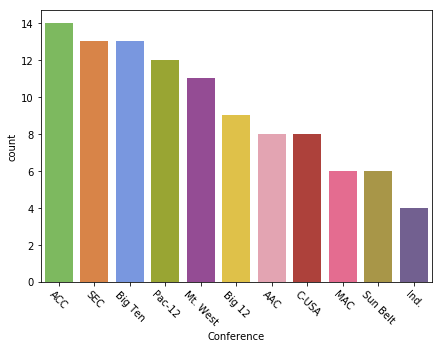

In [455]:
# Change figure size
plt.figure(figsize=(7,5))


# Count Plot (a.k.a. Bar Plot) of the number of Schools in each Conference
sns.countplot(x='Conference', data=finalcoaches, palette=type_colors, order = finalcoaches['Conference'].value_counts().index)
 
# Rotate x-labels
plt.xticks(rotation=-45)

In [508]:
# Copy dataframe and remove median column for correlation map
corr_finalcoaches = finalcoaches

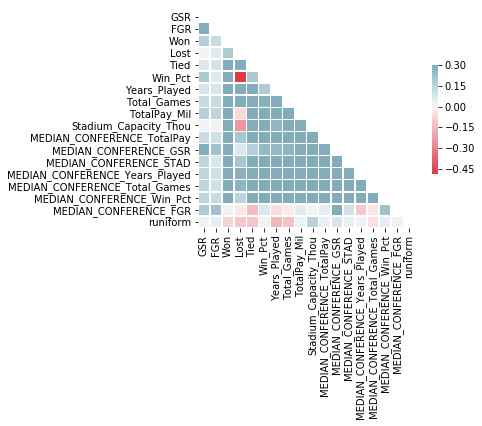

In [503]:

#corr_finalcoaches.drop('MEDIAN_CONFERENCE_FGR', axis=1, inplace=True)


# Correlation Heat Map
corr = finalcoaches.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [511]:
# Copy coaches dataset with only a interested variables
corr_finalcoaches= finalcoaches[['GSR', 'FGR', 'TotalPay_Mil','Win_Pct', 'Won', 'Lost', 'Tied', 'Stadium_Capacity_Thou', 'Years_Played', 'Total_Games']].copy()

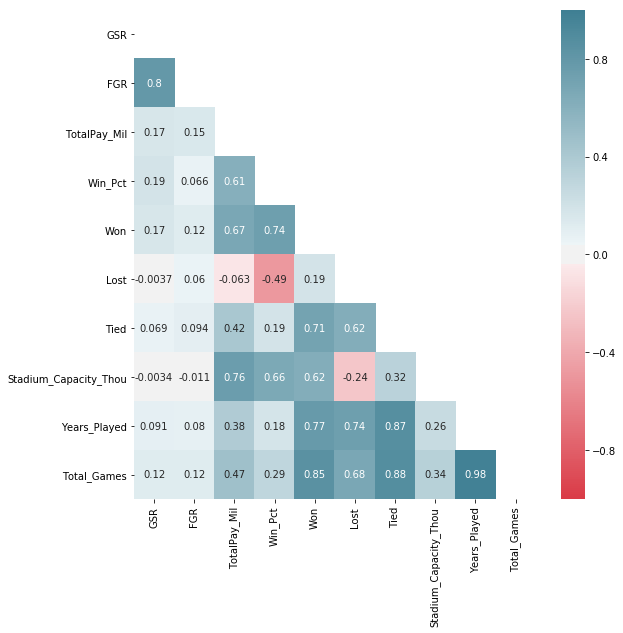

In [515]:
# Correlation Heat Map
corr = corr_finalcoaches.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr,
            vmin=-1,
            cmap= cmap,
            annot=True,
            mask = mask);

In [458]:
# Create Median columns for  Totay Pay, GSR, Stadium Capacity, Win_Pct, Total_Games
med_cof_pay = finalcoaches.groupby(['Conference'])[['TotalPay_Mil']].apply(np.nanmedian)
med_cof_pay.name = 'MEDIAN_CONFERENCE_TotalPay'
finalcoaches=finalcoaches.join(med_cof_pay, on=['Conference'])

med_cof_gsr = finalcoaches.groupby(['Conference'])[['GSR']].apply(np.nanmedian)
med_cof_gsr.name = 'MEDIAN_CONFERENCE_GSR'
finalcoaches=finalcoaches.join(med_cof_gsr, on=['Conference'])

med_cof_stad = finalcoaches.groupby(['Conference'])[['Stadium_Capacity_Thou']].apply(np.nanmedian)
med_cof_stad.name = 'MEDIAN_CONFERENCE_STAD'
finalcoaches=finalcoaches.join(med_cof_stad, on=['Conference'])

med_cof_yearsplayed = finalcoaches.groupby(['Conference'])[['Years_Played']].apply(np.nanmedian)
med_cof_yearsplayed.name = 'MEDIAN_CONFERENCE_Years_Played'
finalcoaches=finalcoaches.join(med_cof_yearsplayed, on=['Conference'])

med_cof_games = finalcoaches.groupby(['Conference'])[['Total_Games']].apply(np.nanmedian)
med_cof_games.name = 'MEDIAN_CONFERENCE_Total_Games'
finalcoaches=finalcoaches.join(med_cof_games, on=['Conference'])

med_cof_wins = finalcoaches.groupby(['Conference'])[['Win_Pct']].apply(np.nanmedian)
med_cof_wins.name = 'MEDIAN_CONFERENCE_Win_Pct'
finalcoaches=finalcoaches.join(med_cof_wins, on=['Conference'])

med_cof_fgr = finalcoaches.groupby(['Conference'])[['FGR']].apply(np.nanmedian)
med_cof_fgr.name = 'MEDIAN_CONFERENCE_FGR'
finalcoaches=finalcoaches.join(med_cof_fgr, on=['Conference'])

In [459]:
finalcoaches.head()

,School,Conference,Coach,GSR,FGR,Won,Lost,Tied,Win_Pct,Years_Played,Total_Games,TotalPay_Mil,Stadium_Capacity_Thou,MEDIAN_CONFERENCE_TotalPay,MEDIAN_CONFERENCE_GSR,MEDIAN_CONFERENCE_STAD,MEDIAN_CONFERENCE_Years_Played,MEDIAN_CONFERENCE_Total_Games,MEDIAN_CONFERENCE_Win_Pct
0,Air Force,Mt. West,Troy Calhoun,93,61.0,390,327,13,0.543,63,730,0.8850,52.480,0.885000,68.0,40.7270,101.0,1037.0,0.501
2,Akron,MAC,Terry Bowden,58,52.0,523,546,36,0.490,118,1105,0.4125,30.000,0.457750,59.0,30.3600,114.5,1067.5,0.464
3,Alabama,SEC,Nick Saban,73,57.0,905,329,43,0.726,124,1277,8.3070,101.821,4.013600,70.0,80.2500,125.0,1270.0,0.584
4,South Alabama,Sun Belt,Steve Campbell,73,57.0,55,59,0,0.482,10,114,0.6000,40.646,0.755000,64.5,30.6955,101.0,984.0,0.487
5,Alabama at Birmingham,C-USA,Bill Clark,60,55.0,126,158,0,0.444,21,284,0.9000,71.594,0.782787,66.0,33.5000,102.5,1039.0,0.512


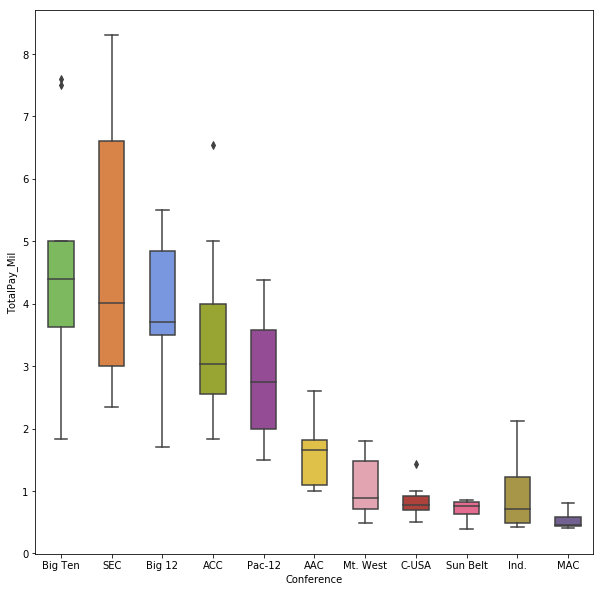

In [460]:
# Reference : http://seaborn.pydata.org/generated/seaborn.boxplot.html
# Sort dataframe based on MEDIAN_CONFERENCE_TotalPay
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_TotalPay', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))

# Plot boxplot using seaborn
bplot = sns.boxplot(y='TotalPay_Mil', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

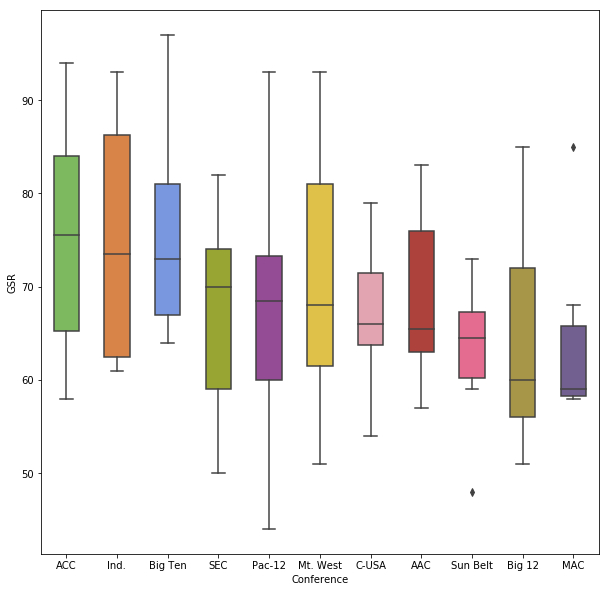

In [461]:
# Sort dataframe based on MEDIAN_CONFERENCE_GSR
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_GSR', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))


bplot = sns.boxplot(y='GSR', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

In [462]:
finalcoaches.columns

Index(['School', 'Conference', 'Coach', 'GSR', 'FGR', 'Won', 'Lost', 'Tied',
       'Win_Pct', 'Years_Played', 'Total_Games', 'TotalPay_Mil',
       'Stadium_Capacity_Thou', 'MEDIAN_CONFERENCE_TotalPay',
       'MEDIAN_CONFERENCE_GSR', 'MEDIAN_CONFERENCE_STAD',
       'MEDIAN_CONFERENCE_Years_Played', 'MEDIAN_CONFERENCE_Total_Games',
       'MEDIAN_CONFERENCE_Win_Pct'],
      dtype='object')

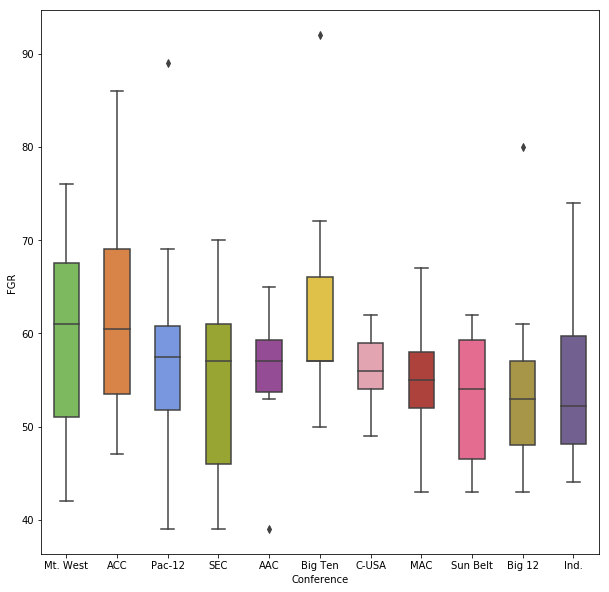

In [465]:
# Sort dataframe based on MEDIAN_CONFERENCE_FGR
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_FGR', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))


bplot = sns.boxplot(y='FGR', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

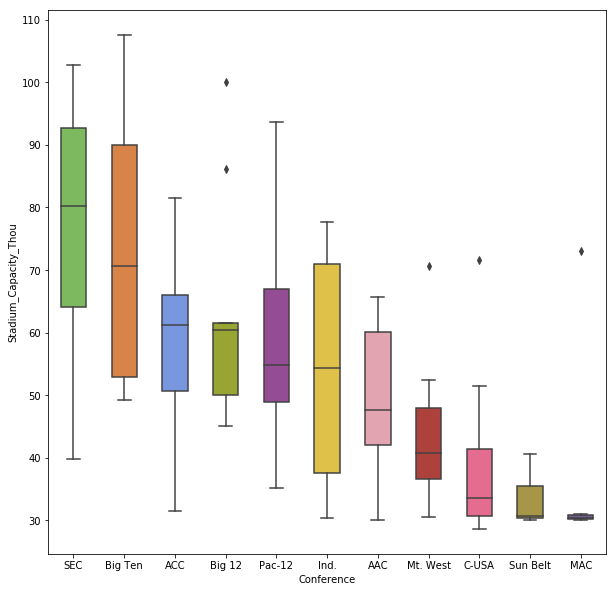

In [468]:
# Sort dataframe based on MEDIAN_CONFERENCE_STAD
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_STAD', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))


bplot = sns.boxplot(y='Stadium_Capacity_Thou', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

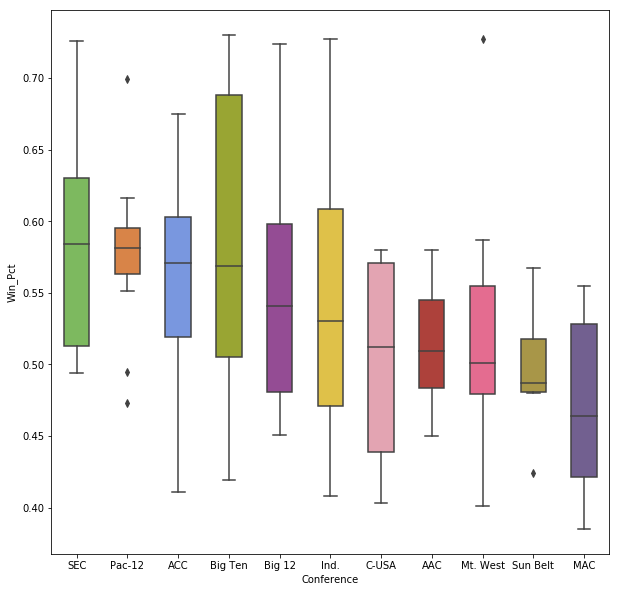

In [466]:
# Sort dataframe based on MEDIAN_CONFERENCE_Win_Pct
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_Win_Pct', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))


bplot = sns.boxplot(y='Win_Pct', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

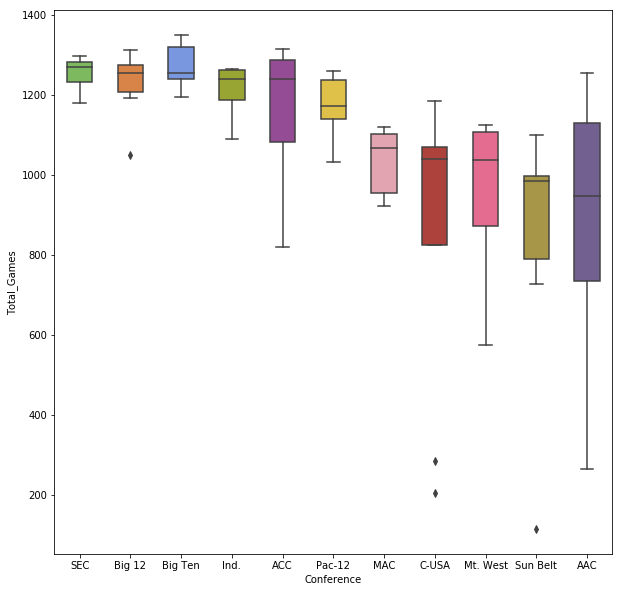

In [469]:
# Sort dataframe based on MEDIAN_CONFERENCE_Total_Games
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_Total_Games', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))


bplot = sns.boxplot(y='Total_Games', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

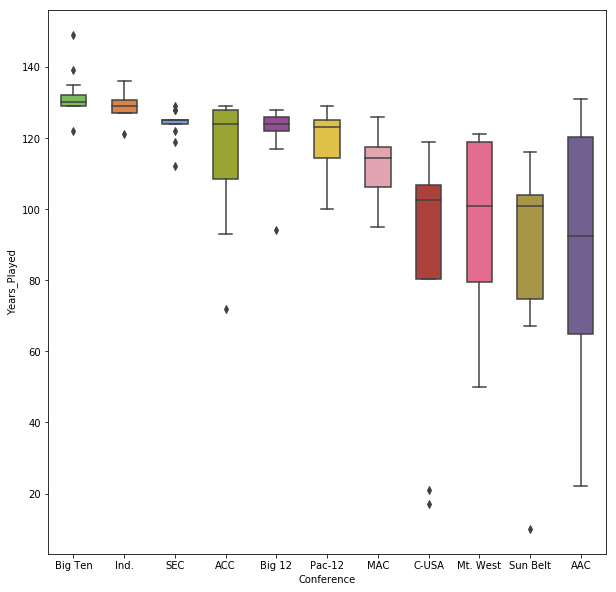

In [470]:
# Sort dataframe based on MEDIAN_CONFERENCE_Years_Played
finalcoaches.sort_values(by='MEDIAN_CONFERENCE_Years_Played', ascending=False, inplace=True)

# Change figure size
plt.figure(figsize=(10,10))


bplot = sns.boxplot(y='Years_Played', x='Conference', 
                 data=finalcoaches, 
                 width=0.5,
                 palette=type_colors)

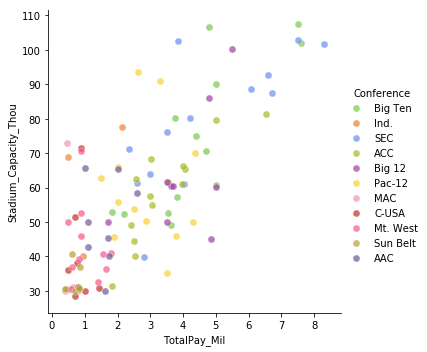

In [473]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay colored by Conference
g = sns.FacetGrid(finalcoaches, hue="Conference", palette=type_colors, height=5)
g.map(plt.scatter, "TotalPay_Mil", "Stadium_Capacity_Thou", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

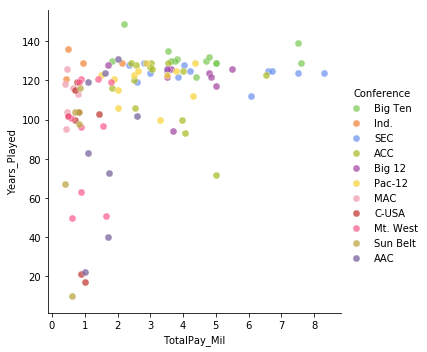

In [474]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay colored by Conference
g = sns.FacetGrid(finalcoaches, hue="Conference", palette=type_colors, height=5)
g.map(plt.scatter, "TotalPay_Mil", "Years_Played", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

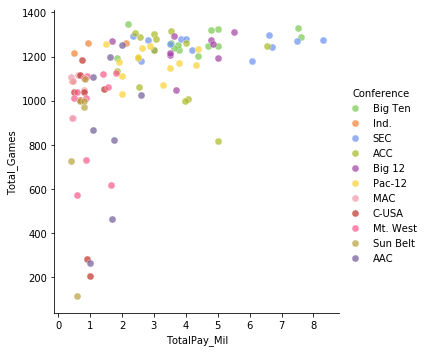

In [475]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay colored by Conference
g = sns.FacetGrid(finalcoaches, hue="Conference", palette=type_colors, height=5)
g.map(plt.scatter, "TotalPay_Mil", "Total_Games", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

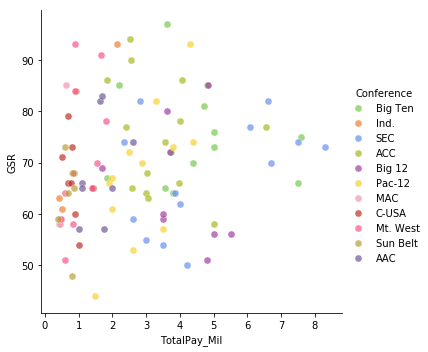

In [476]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay colored by Conference
g = sns.FacetGrid(finalcoaches, hue="Conference", palette=type_colors, height=5)
g.map(plt.scatter, "TotalPay_Mil", "GSR", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

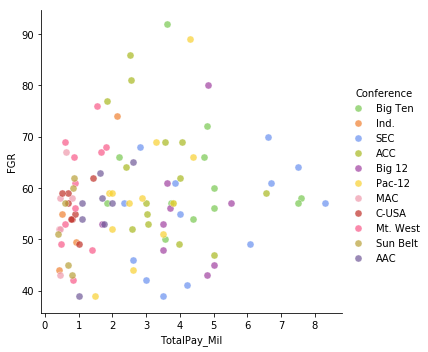

In [477]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay colored by Conference
g = sns.FacetGrid(finalcoaches, hue="Conference", palette=type_colors, height=5)
g.map(plt.scatter, "TotalPay_Mil", "FGR", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

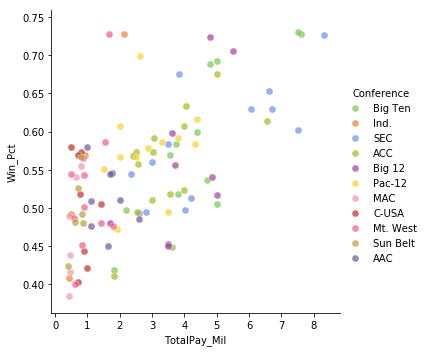

In [478]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay colored by Conference
g = sns.FacetGrid(finalcoaches, hue="Conference", palette=type_colors, height=5)
g.map(plt.scatter, "TotalPay_Mil", "Win_Pct", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

<Figure size 720x720 with 0 Axes>

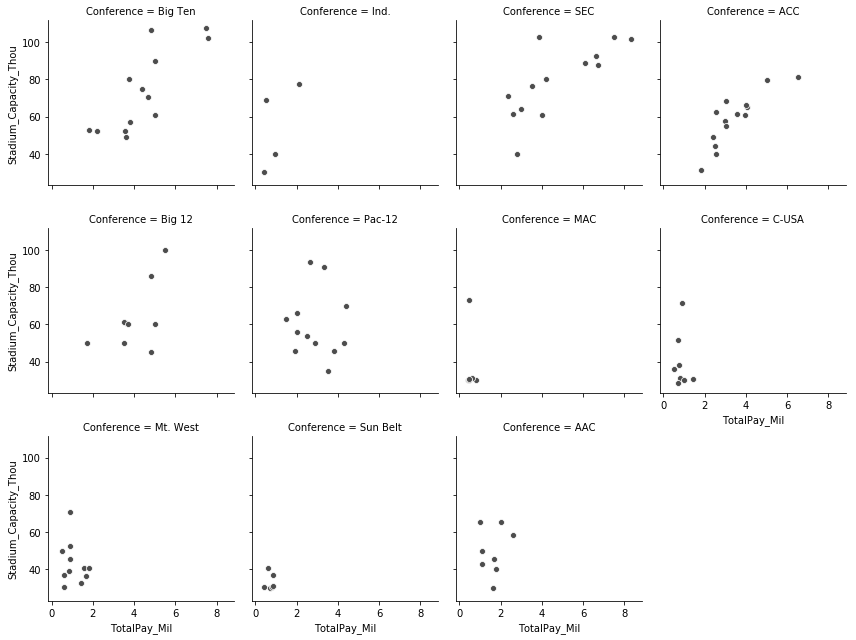

In [479]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay by Conference
plt.figure(figsize=(10,10)) # Change figure size
g = sns.FacetGrid(finalcoaches, col="Conference", col_wrap=4, height=3)
g.map(sns.scatterplot, "TotalPay_Mil", "Stadium_Capacity_Thou", color=".3", ci=None);

<Figure size 720x720 with 0 Axes>

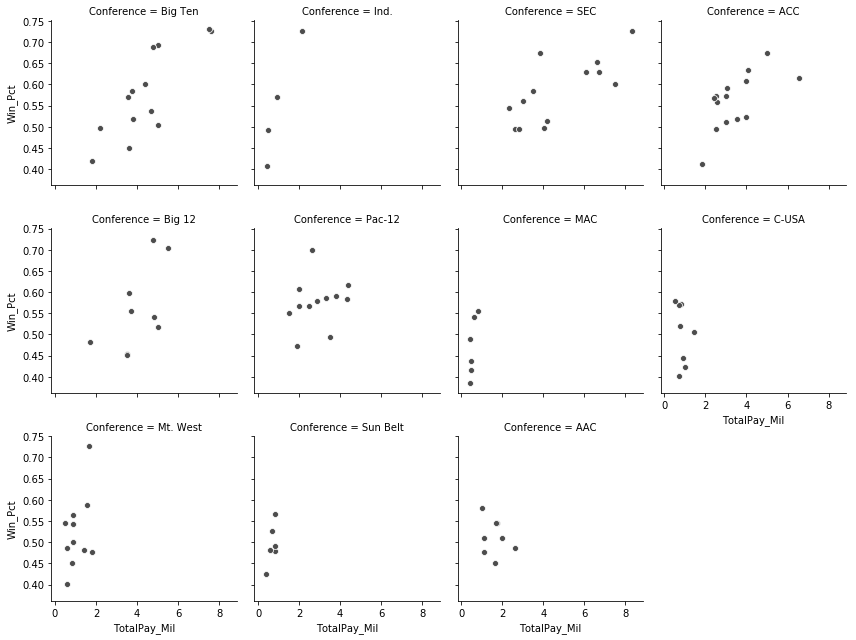

In [480]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay by Conference
plt.figure(figsize=(10,10))  # Change figure size
g = sns.FacetGrid(finalcoaches, col="Conference", col_wrap=4, height=3)
g.map(sns.scatterplot, "TotalPay_Mil", "Win_Pct", color=".3", ci=None);

<Figure size 720x720 with 0 Axes>

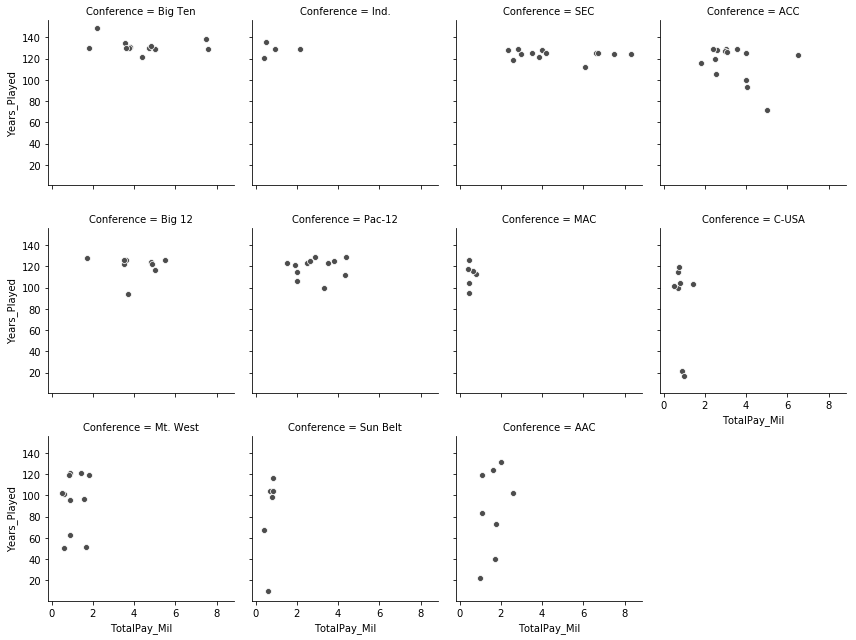

In [481]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay by Conference
plt.figure(figsize=(10,10))   # Change figure size
g = sns.FacetGrid(finalcoaches, col="Conference", col_wrap=4, height=3)
g.map(sns.scatterplot, "TotalPay_Mil", "Years_Played", color=".3", ci=None);

<Figure size 720x720 with 0 Axes>

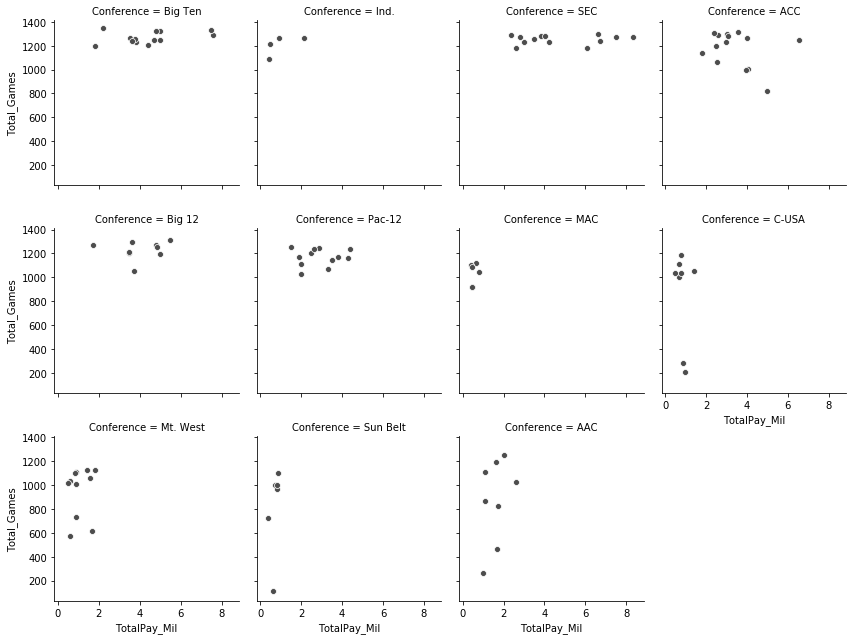

In [482]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay by Conference
plt.figure(figsize=(10,10))  # Change figure size
g = sns.FacetGrid(finalcoaches, col="Conference", col_wrap=4, height=3)
g.map(sns.scatterplot, "TotalPay_Mil", "Total_Games", color=".3", ci=None);

<Figure size 720x720 with 0 Axes>

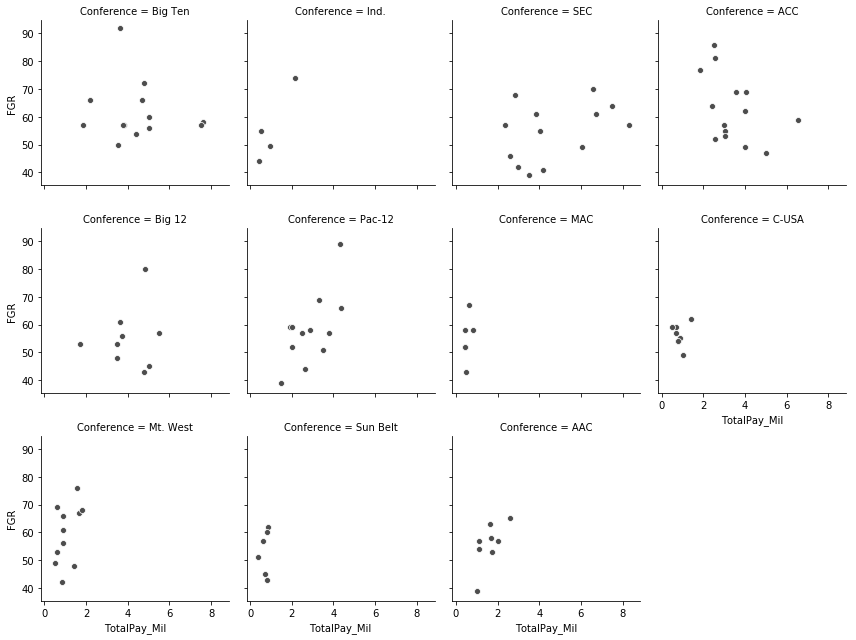

In [483]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay by Conference
plt.figure(figsize=(10,10)) # Change figure size
g = sns.FacetGrid(finalcoaches, col="Conference", col_wrap=4, height=3)
g.map(sns.scatterplot, "TotalPay_Mil", "FGR", color=".3", ci=None);

<Figure size 720x720 with 0 Axes>

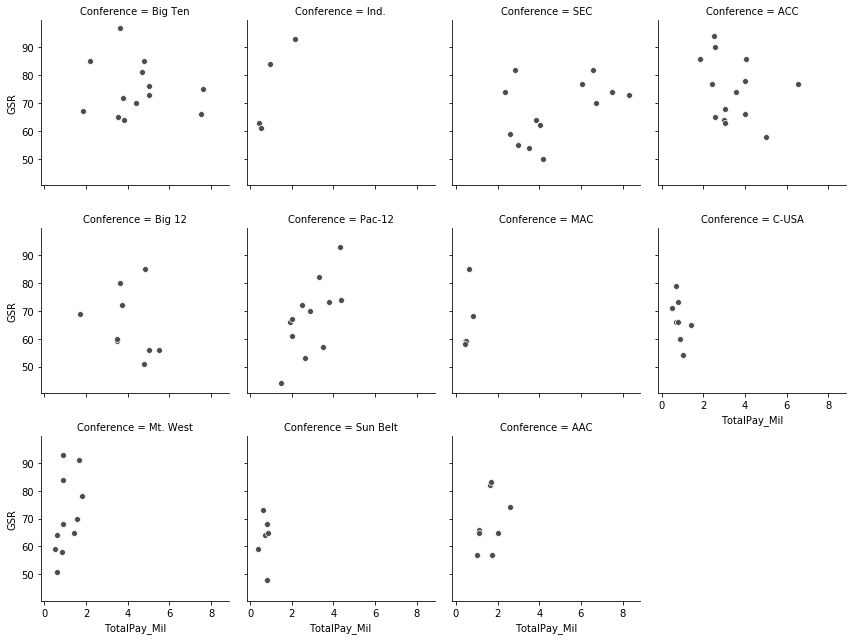

In [484]:
# Use 3 dimensional scatterplot with showing varible in relation to total pay by Conference
plt.figure(figsize=(10,10))   # Change figure size
g = sns.FacetGrid(finalcoaches, col="Conference", col_wrap=4, height=3)
g.map(sns.scatterplot, "TotalPay_Mil", "GSR", color=".3", ci=None);

In [ ]:
"""CREATING REGRESSION MODELS"""

In [485]:
# Model 1
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]
coaches_test = finalcoaches[finalcoaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_1 = str('TotalPay_Mil ~ Conference + Stadium_Capacity_Thou + GSR + FGR+ Win_Pct')

# fit the model to the training set
train_model_fit = smf.ols(my_model_1, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)




coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [497]:
# Model 1 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_1, data = finalcoaches).fit()
print(my_model_fit.summary())



Proportion of Test Set Variance Accounted for:  0.548
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     24.63
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.08e-24
Time:                        04:39:15   Log-Likelihood:                -132.43
No. Observations:                 104   AIC:                             294.9
Df Residuals:                      89   BIC:                             334.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [516]:
# Model 2
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]
coaches_test = finalcoaches[finalcoaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_2 = str('TotalPay_Mil ~ Conference + Stadium_Capacity_Thou + GSR')

# fit the model to the training set
train_model_fit = smf.ols(my_model_2, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)





coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [517]:
# Model 2 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_2, data = finalcoaches).fit()
print(my_model_fit.summary())




Proportion of Test Set Variance Accounted for:  0.593
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     25.62
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           4.18e-24
Time:                        05:09:42   Log-Likelihood:                -138.01
No. Observations:                 104   AIC:                             302.0
Df Residuals:                      91   BIC:                             336.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [518]:
# Model 3
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]
coaches_test = finalcoaches[finalcoaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_3 = str('TotalPay_Mil ~ Conference + Stadium_Capacity_Thou + FGR ')

# fit the model to the training set
train_model_fit = smf.ols(my_model_3, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)





coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [519]:
# Model 3 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_3, data = finalcoaches).fit()
print(my_model_fit.summary())




Proportion of Test Set Variance Accounted for:  0.582
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     24.98
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           9.76e-24
Time:                        05:11:14   Log-Likelihood:                -139.01
No. Observations:                 104   AIC:                             304.0
Df Residuals:                      91   BIC:                             338.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [521]:
# Model 4
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]
coaches_test = finalcoaches[finalcoaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_4 = str('TotalPay_Mil ~ Conference + Stadium_Capacity_Thou ')

# fit the model to the training set
train_model_fit = smf.ols(my_model_4, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)





coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [522]:
# Model 4 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_4, data = finalcoaches).fit()
print(my_model_fit.summary())




Proportion of Test Set Variance Accounted for:  0.564
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     25.85
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.59e-23
Time:                        05:12:40   Log-Likelihood:                -141.55
No. Observations:                 104   AIC:                             307.1
Df Residuals:                      92   BIC:                             338.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [523]:
# Model 5
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]

# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_5 = str('TotalPay_Mil ~ Conference + Win_Pct ')

# fit the model to the training set
train_model_fit = smf.ols(my_model_5, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)




coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [524]:
# Model 5 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_5, data = finalcoaches).fit()
print(my_model_fit.summary())





Proportion of Test Set Variance Accounted for:  0.628
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     26.86
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           4.33e-24
Time:                        05:15:02   Log-Likelihood:                -140.03
No. Observations:                 104   AIC:                             304.1
Df Residuals:                      92   BIC:                             335.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [528]:
# Model 6
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]


# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_6 = str('TotalPay_Mil ~ Conference + Win_Pct + GSR ')

# fit the model to the training set
train_model_fit = smf.ols(my_model_6, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)




coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [526]:
# Model 6 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_6, data = finalcoaches).fit()
print(my_model_fit.summary())




Proportion of Test Set Variance Accounted for:  0.632
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     24.55
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.77e-23
Time:                        05:16:33   Log-Likelihood:                -139.71
No. Observations:                 104   AIC:                             305.4
Df Residuals:                      91   BIC:                             339.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [529]:
# Model 7
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]


# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_7 = str('TotalPay_Mil ~ Conference + Win_Pct + FGR ')

# fit the model to the training set
train_model_fit = smf.ols(my_model_7, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)





coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [530]:
# Model 7 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_7, data = finalcoaches).fit()
print(my_model_fit.summary())





Proportion of Test Set Variance Accounted for:  0.634
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     25.14
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           7.96e-24
Time:                        05:22:01   Log-Likelihood:                -138.77
No. Observations:                 104   AIC:                             303.5
Df Residuals:                      91   BIC:                             337.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [531]:
# Model 8
# employ training-and-test regimen for model validation
np.random.seed(1234)
finalcoaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(finalcoaches))
coaches_train = finalcoaches[finalcoaches['runiform'] >= 0.33]


# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model 
my_model_8 = str('TotalPay_Mil ~ Conference  ')

# fit the model to the training set
train_model_fit = smf.ols(my_model_8, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_attend'] = train_model_fit.predict(coaches_test)





coaches_train data frame (rows, columns):  (77, 21)
            School Conference          Coach  GSR   FGR  Won  Lost  Tied  \
72        Nebraska    Big Ten    Scott Frost   76  60.0  897   388    40   
84      Ohio State    Big Ten    Urban Meyer   75  58.0  911   325    53   
92          Purdue    Big Ten     Jeff Brohm   64  57.0  614   567    48   
7   Michigan State    Big Ten  Mark Dantonio   70  54.0  701   459    44   
66        Michigan    Big Ten   Jim Harbaugh   66  57.0  953   342    36   

    Win_Pct  Years_Played  ...  TotalPay_Mil  Stadium_Capacity_Thou  \
72    0.692           129  ...      5.000000                 89.959   
84    0.727           129  ...      7.600000                102.082   
92    0.519           131  ...      3.800000                 57.236   
7     0.600           122  ...      4.390417                 75.005   
66    0.730           139  ...      7.504000                107.601   

    MEDIAN_CONFERENCE_TotalPay  MEDIAN_CONFERENCE_GSR  MEDIAN_C

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [532]:
# Model 8 compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay_Mil'].corr(coaches_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model_8, data = finalcoaches).fit()
print(my_model_fit.summary())





Proportion of Test Set Variance Accounted for:  0.548
                            OLS Regression Results                            
Dep. Variable:           TotalPay_Mil   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     17.50
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.94e-17
Time:                        05:24:18   Log-Likelihood:                -159.76
No. Observations:                 104   AIC:                             341.5
Df Residuals:                      93   BIC:                             370.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [535]:
corr_finalcoaches.columns

Index(['GSR', 'FGR', 'TotalPay_Mil', 'Win_Pct', 'Won', 'Lost', 'Tied',
       'Stadium_Capacity_Thou', 'Years_Played', 'Total_Games'],
      dtype='object')

In [538]:
interesting_finalcoaches = corr_finalcoaches[['Stadium_Capacity_Thou','TotalPay_Mil','Win_Pct','GSR', 'FGR','Total_Games', 'Years_Played' ]].copy()

AttributeError: module 'seaborn' has no attribute 'plt'

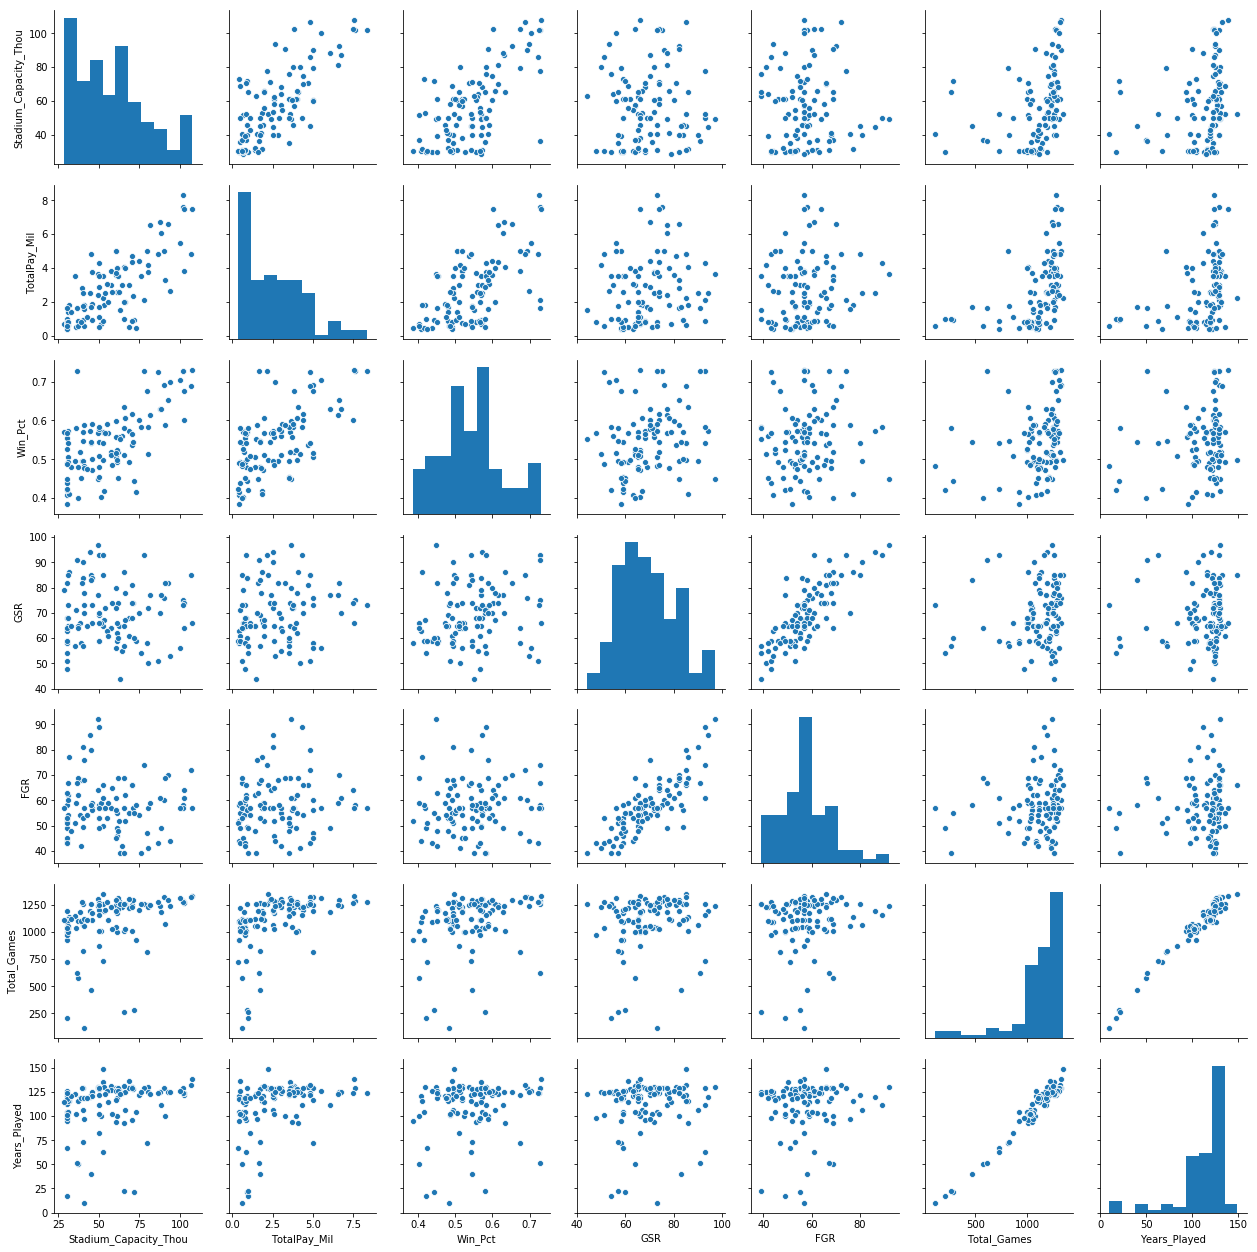

In [539]:
# Create correlation matrix
# library 
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(interesting_finalcoaches)
sns.plt.show()
